# Imports and data initialization

##### Import libraries:

In [5]:
import folium
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

##### Load data:

In [4]:
# Connect to google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

#Locally
local_path = "data/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv"

Mounted at /content/drive


In [7]:
# Add correct path for location of Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv
path = "/content/drive/MyDrive/Social_Data_and_Visualisation/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv"

df_full = pd.read_csv(path)

##### Add extra attributes to the data frame:

In [8]:
df_full['Year'] = pd.DatetimeIndex(df_full['Date']).year
df_full['Month'] = pd.DatetimeIndex(df_full['Date']).month
df_full['Day'] = pd.DatetimeIndex(df_full['Date']).day
df_full['Hour'] = [int(time[0:2]) for time in (df_full['Time'])]

# Part 1: Temporal Patterns

In this exercise, please generate the visualizations described below. Use the same date-ranges as in Week 1. For each set of plots, describe the plots (as you would in the figure text in a report or paper), and pick a few aspects that stand out to you and comment on those (a couple of ideas below for things that could be interesting to comment on ... but it's OK to chose something else).

In [12]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

In [13]:
# filter dataframe for focus crimes
df = df_full[df_full.Category.isin(focuscrimes)].copy()
# we are going to filter out data from 2018 as they are incomplete
filter_p1 = (df['Year'] >= 2003) & (df['Year'] <= 2017)
df_p1 = df[filter_p1]

We define a function to help as plot for different time periods as:

In [ ]:
def plotFocusCrimes(df, time_list, label_list, time_category):
  plt.figure(figsize=(25,20))

  for j,crime in enumerate(focuscrimes):
    numbers = np.zeros(len(time_list))
    for i, item in enumerate(time_list):
      numbers[i] = len(df[(df[time_category]==item) & (df['Category'] == crime)])
    
    plt.subplot(5,3,j+1)
    plt.title(crime)
    plt.bar(label_list,numbers)
    plt.tight_layout()
    
  plt.show

## Weekly patterns

Basically, we'll forget about the yearly variation and just count up what happens during each weekday. Hint for comment: Some things make sense - for example drunkenness and the weekend. But there are some aspects that were surprising to me. Check out prostitution and mid-week behavior, for example!?

In [ ]:
day_array = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

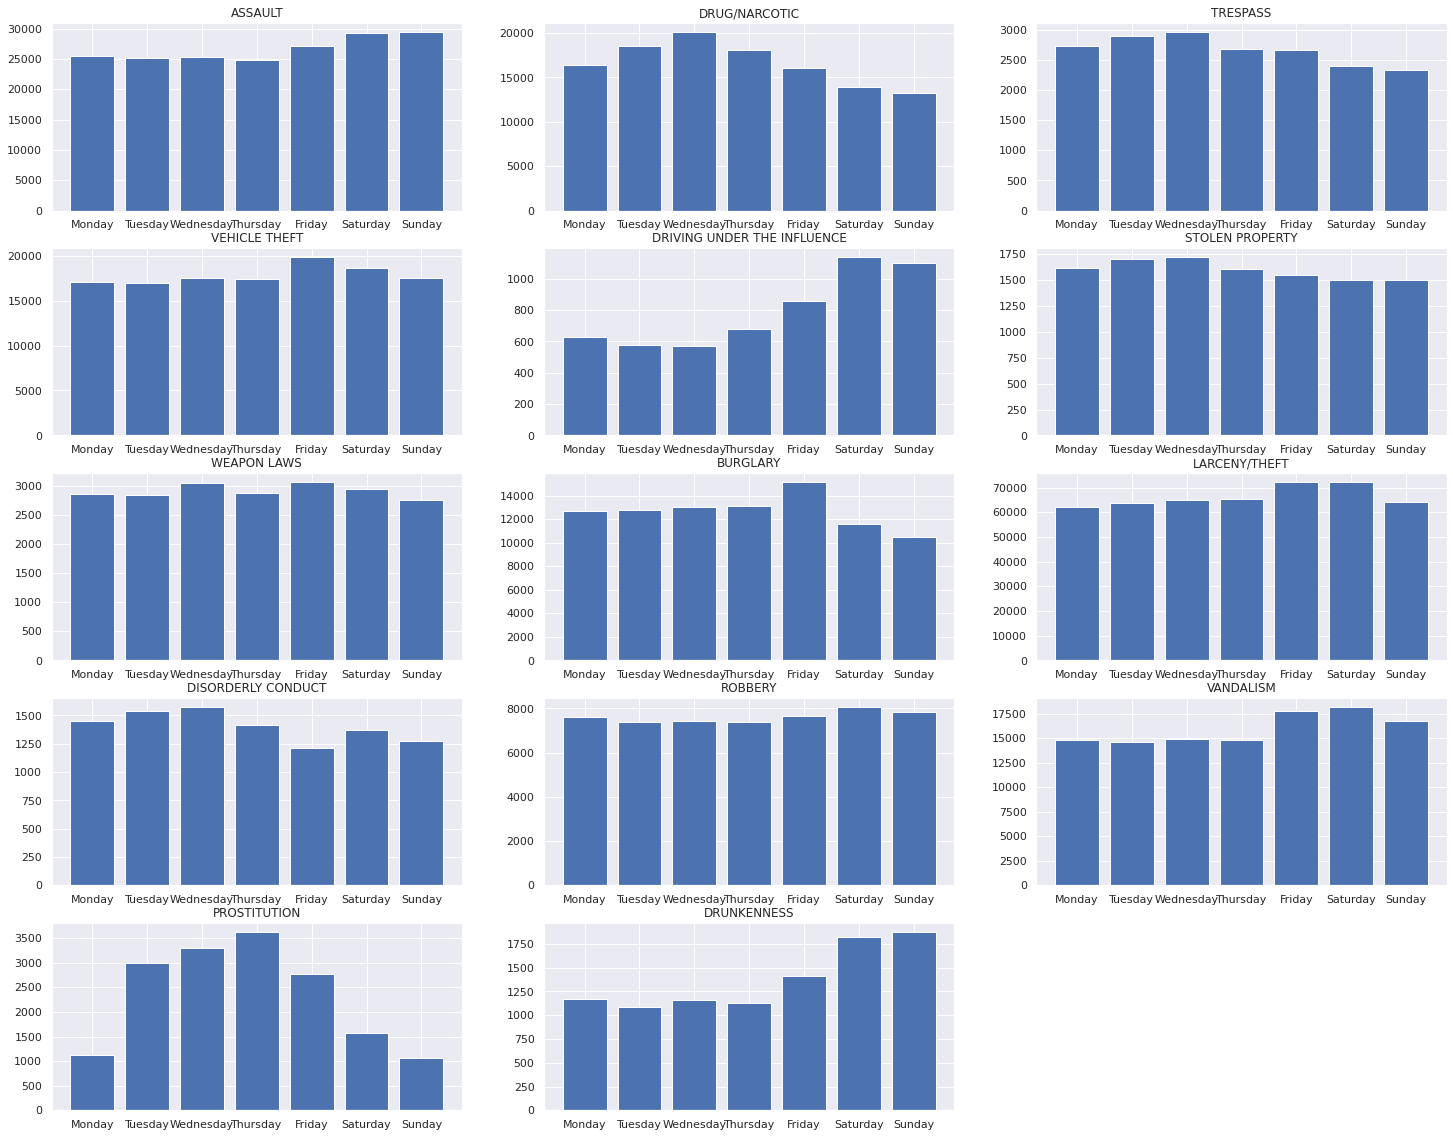

In [ ]:
plotFocusCrimes(df_p1, day_array, day_array, 'DayOfWeek')

By observing the weekly patterns for our crimes we can make several observations. As expected we see that the alcohol related crimes, drunkeness and driving under influence( although not stated which kind of influence we assume that most of the these are related to alcohol) remain relatively  low throughout the week spiking on fridays and particularly the weekends. Another intersting observation is the midweek spike of PROSTITUTION, and to a lesser dergree drug related crimes.

## Monthly Patterns

In [ ]:
month_array = np.sort(df_p1['Month'].unique())
month_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

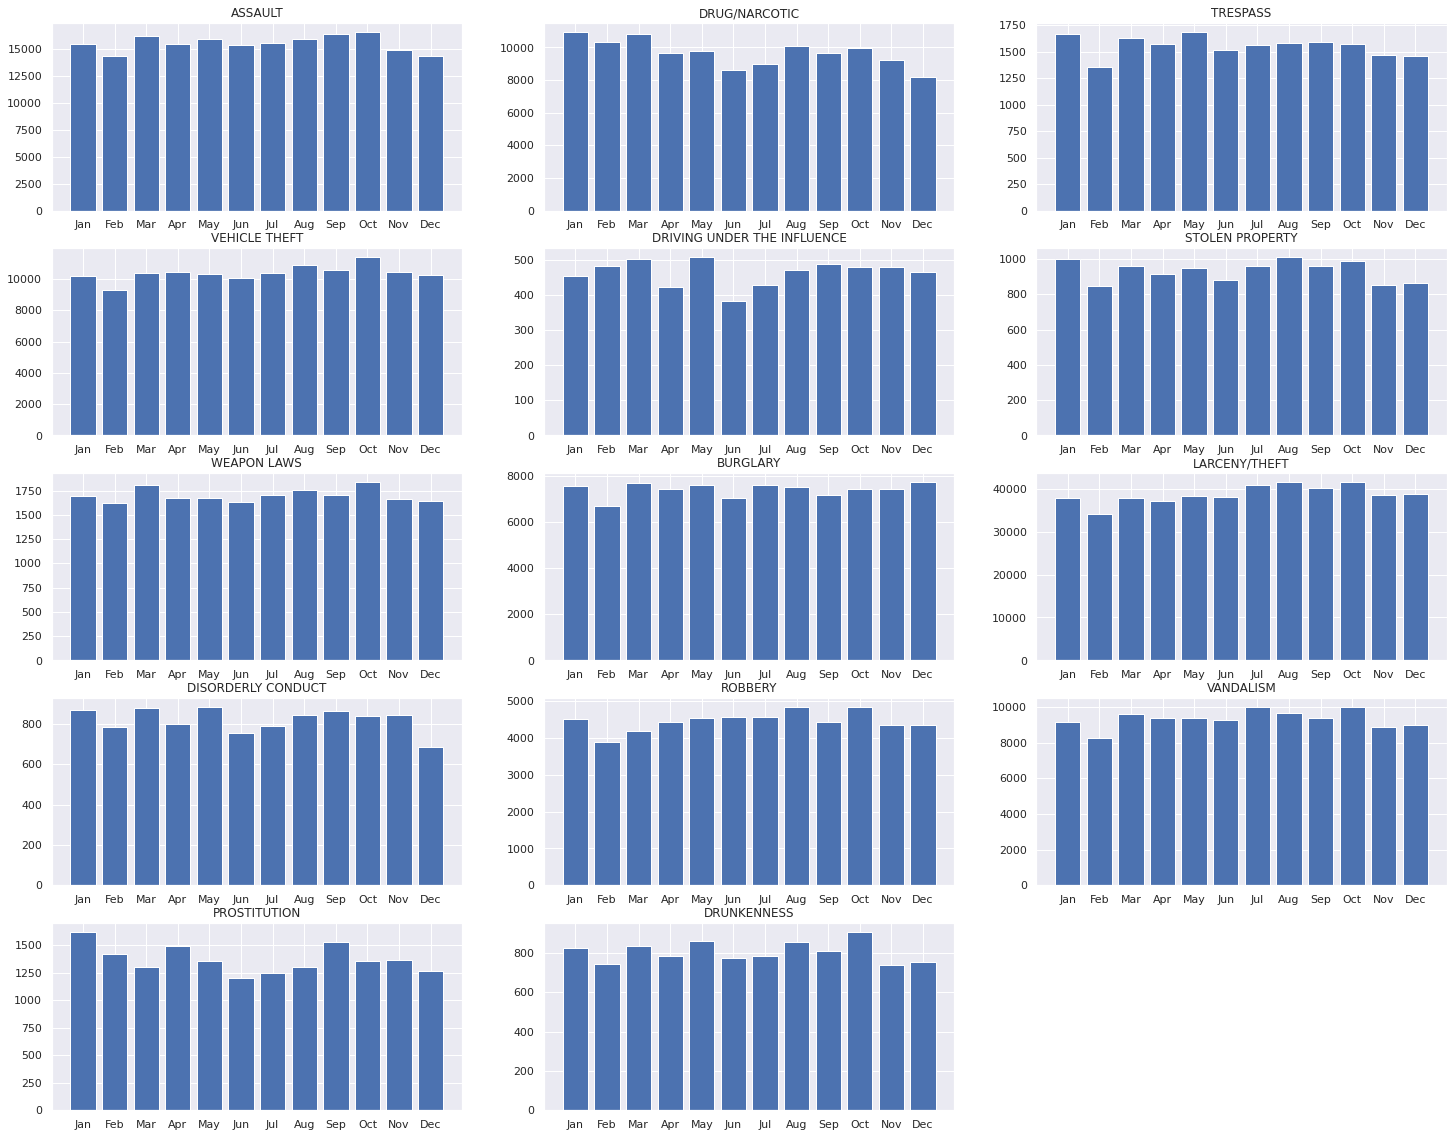

In [ ]:
plotFocusCrimes(df_p1, month_array, month_labels, 'Month')

## Daily Patterns

We'll can also forget about weekday and simply count up the number of each crime-type that occurs in the entire dataset from midnight to 1am, 1am - 2am ... and so on. Again: Give me a couple of comments on what you see.

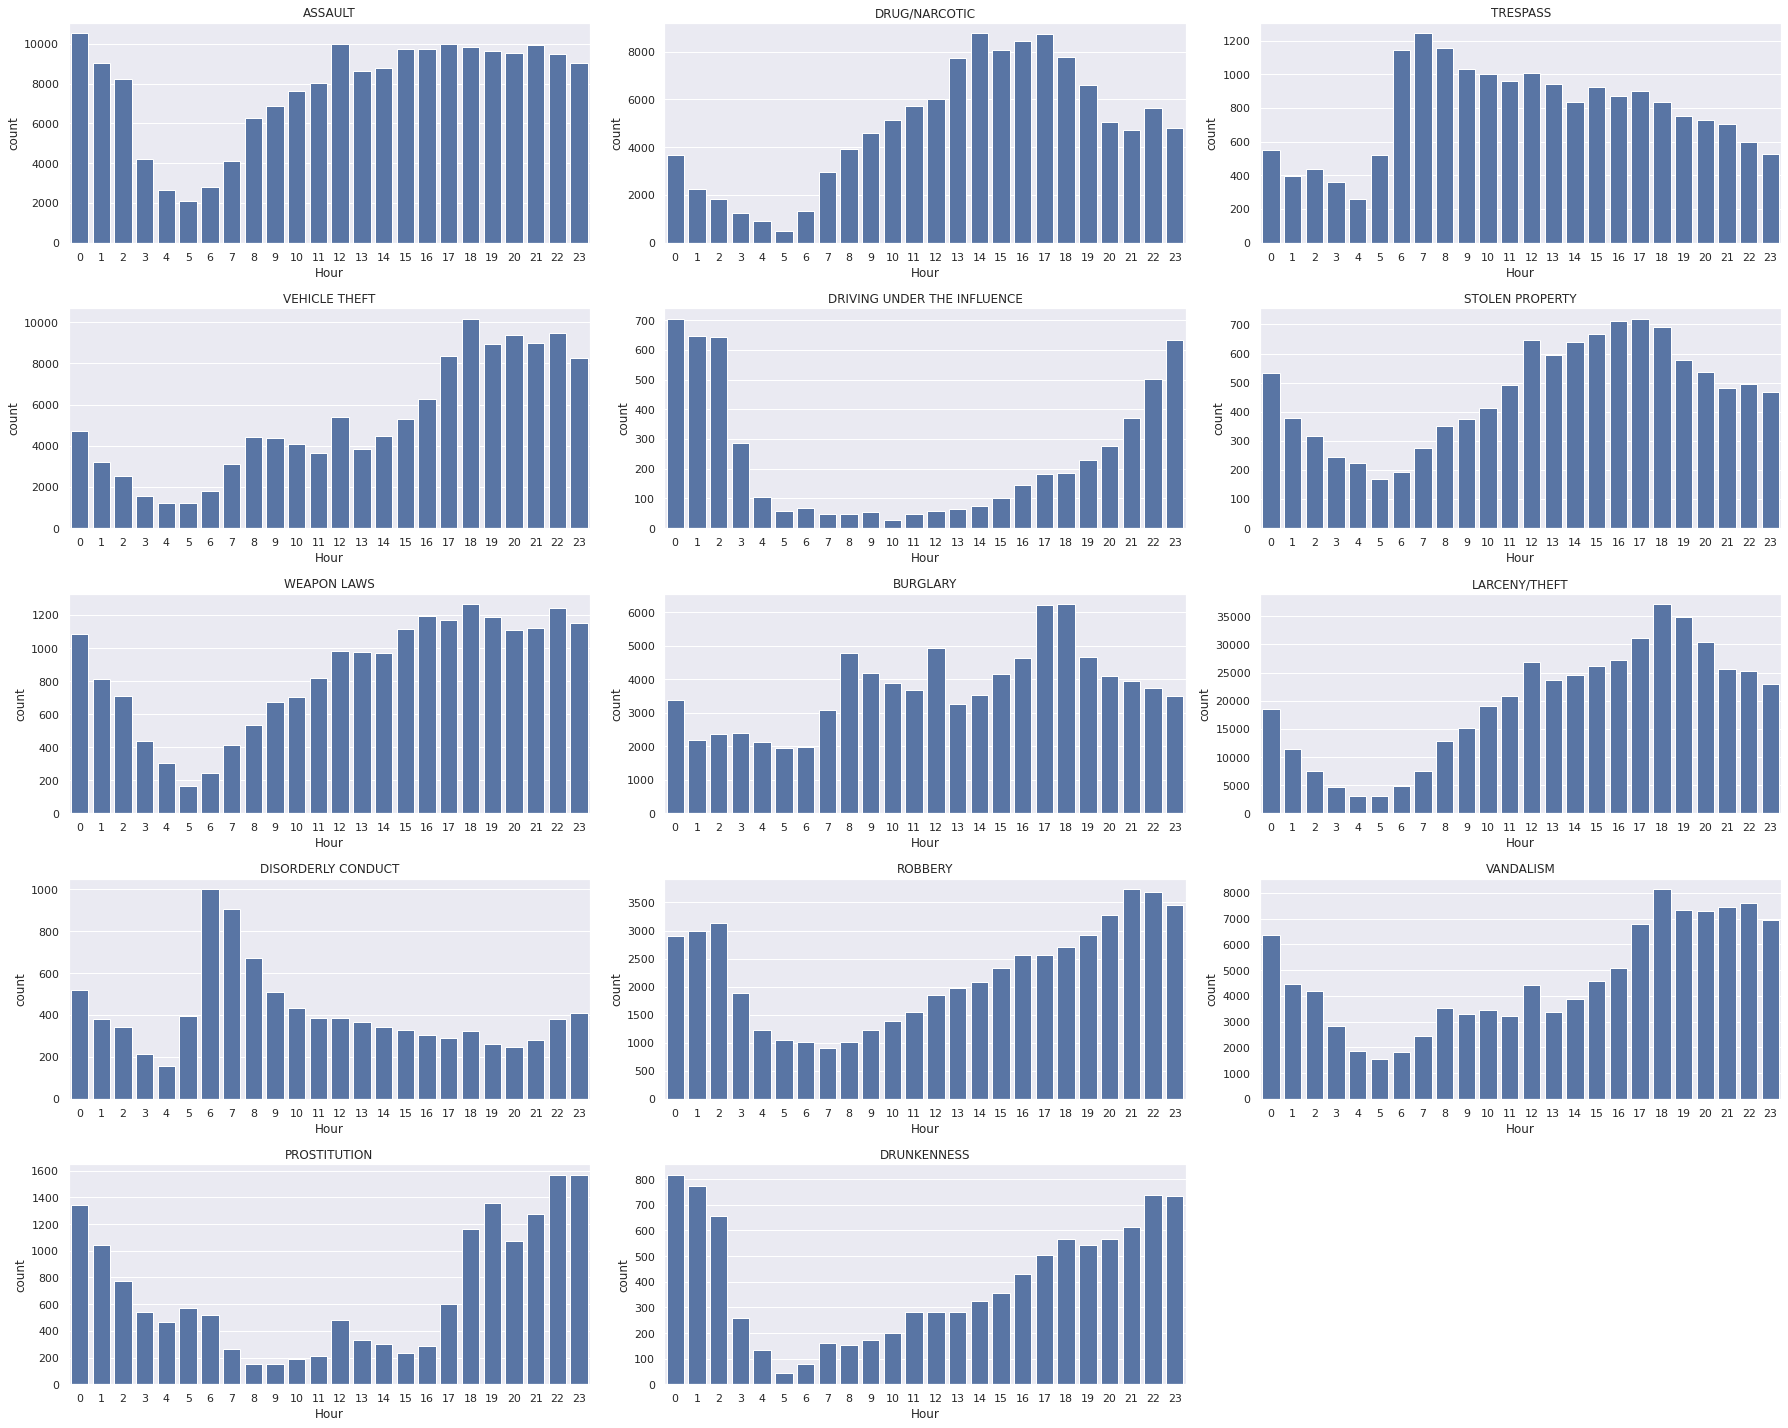

In [ ]:
# %%
plt.figure(figsize=(25,20))
plt.tight_layout()
for i, category in enumerate(focuscrimes):
    plt.subplot(5, 3, i + 1)
    plt.title(category)
    sns.countplot(data=df_p1[df_p1.Category == category], x="Hour", color="b")
    plt.tight_layout()


## Weekly Patterns by Hour

Hours of the week. But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.


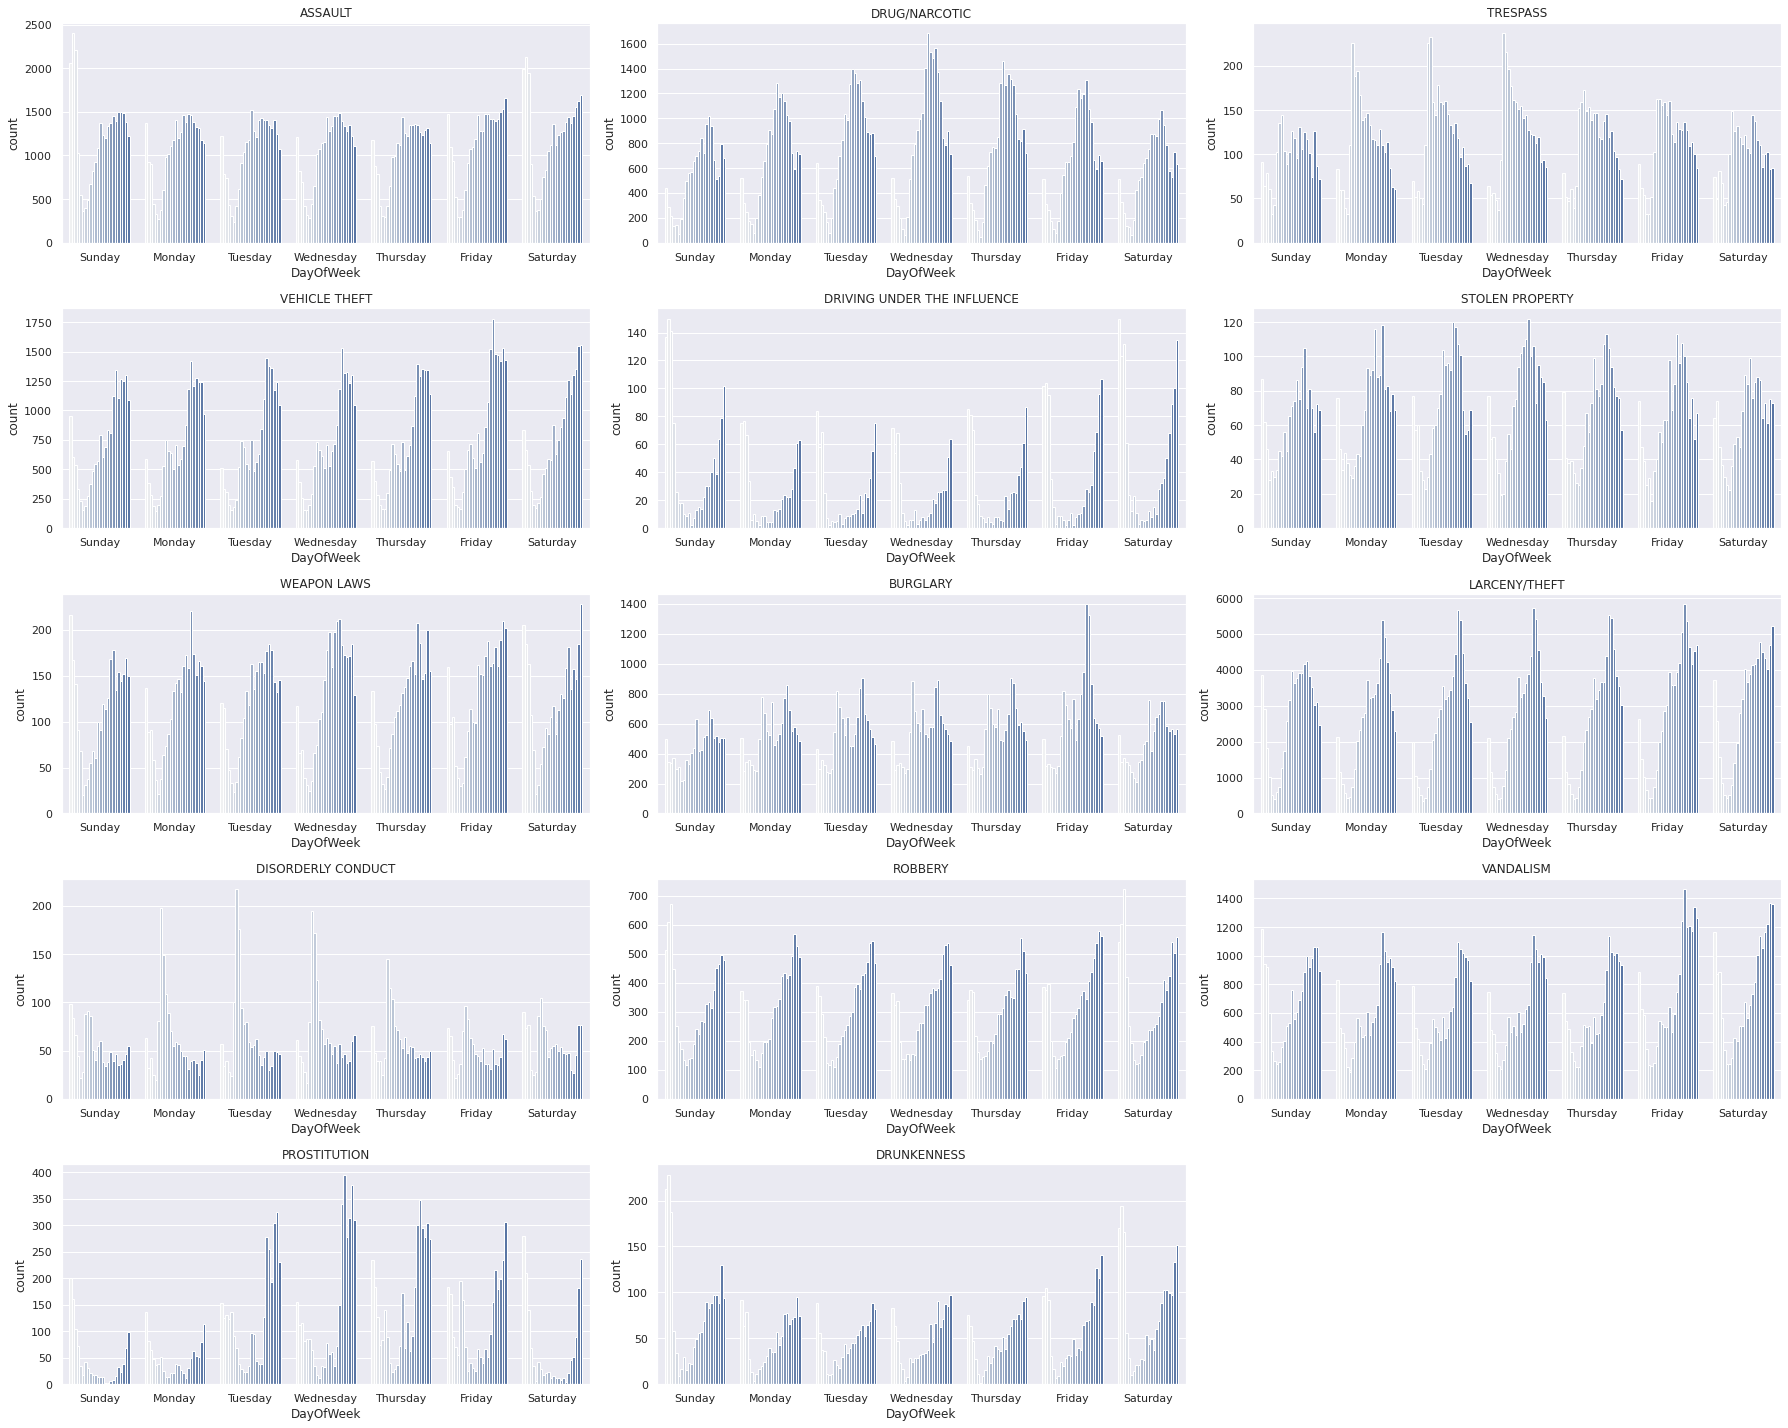

In [ ]:
# %%

# %%
plt.figure(figsize=(25,20))
order = ["Sunday" ,"Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
plt.tight_layout()
for i, category in enumerate(focuscrimes):
    plt.subplot(5, 3, i + 1)
    plt.title(category)
    sns.countplot(
        data=df_p1[df_p1.Category == category],
        x="DayOfWeek",
        order=order,
        hue="Hour",
       # palette=palette,
        color='b'
    )
    
    plt.legend([], [], frameon=False)
    plt.tight_layout()

# Part 2: Thinking about data and visualization

## Pearson Correlation
Explain in your own words how the Pearson correlation works and write down it's mathematical formulation. Can you think of an example where it fails (and visualization works)?

##### Answer
Peason correlation given a pair of random variables *X*, and *Y* can be defined as:
$$ ρ_{X,Y} = \frac{\text{cov}(X,Y)}{\sigma_X\sigma_Y}$$, 
where $\sigma$ is standard deviation and $\text{cov}$ is the covariance of our two variables.

Pearson correlation, by comparing the covariance with the standard deviation of our two variables gives a normalized measure between -1 and 1, which reflects a linear relation between our 2 variables. A value of 1 would mean that a straight line of positive slope perfectly fits our dataset, same for -1 and negative slope. A value of 0 indicates the no linear relationship can be see between our two variables.

Pearson correlation as we saw in the videos regarding [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet), fails when there exist a non-linear relation between our two variables, or when there are outliers in the dataset.


## Bar chart vs Histogram
What is the difference between a bar-chart and a histogram?

##### Answer

Bar charts are used for to compare variables, while histograms are used to plot distributions of quantitative data. 
In bar charts, columns represent the size of a group defined by a categorical label.
In histograms, a column represent a binned range of  values, and the height of the column represent the number of samples in that bin.
Since histograms display distribution of quantitative data, X-axis is sorted, while in a bar chart where the labels on X-axis are categorical no sorting is necessary.


## Bin size in Histograms
I mention in the video that it's important to choose the right bin-size in histograms. But how do you do that? Do a Google search to find a criterion you like and explain it.

###### Answer
The choice of in size is really important, as different bin sizes can reveal different features of the dataset. E.g. wider bins can reduce noise but at the same time can hide, fine details of our distribution.

Several methods have been proposed for selecting bin size, one of them been [Sturge's formula](https://www.jstor.org/stable/2965501). 
Sturge's rule tries to optimize the number of bins as:

$$k= 1 + \log_2 n$$

where *k* is th number of bins and *n* the number of observations available.
Sturge's rule works best with sample sizes n, where 30<n<200, because for less than 30 sample the number of bins will be small, making it hard to generalize, while for samples n>200 it may lead to over-smoothing.


# Part 3

## Jitter plot
First, let's make a jitter-plot based on SF Police data. So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and create a jitter plot of the arrest times during a single hour (like 13-14, for example). So let time run on the $x$-axis and create vertical jitter.

In [ ]:
# choose crime type
crime_type="LARCENY/THEFT"
# choose period
month = [1]
# filter df
condition = (df.Category == crime_type) & (df.Month.isin(month))
df_jitter = df[condition]
# select 1 hour
df_jitter_1hour = df_jitter[df_jitter.Hour == 14]

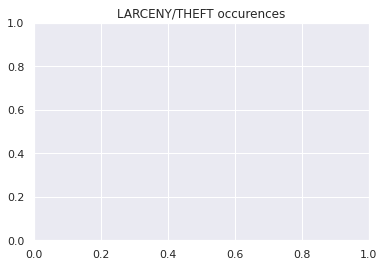

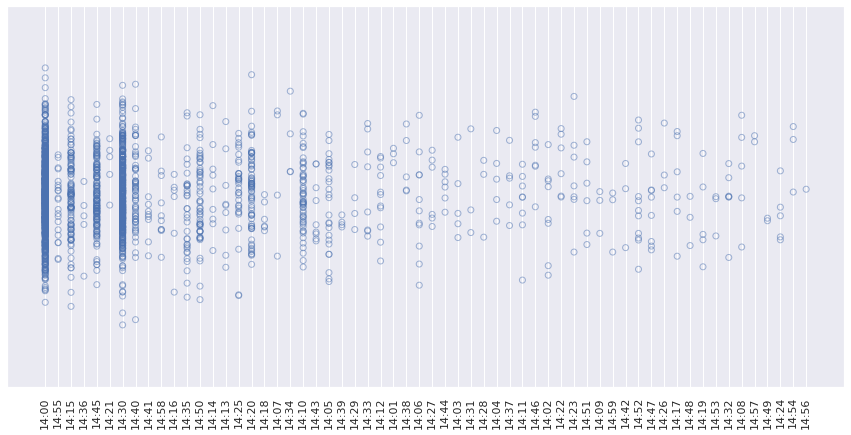

In [ ]:
# create jitter plot
x = df_jitter_1hour.Time
y = [1 + np.random.randn()/5 for i in range(len(df_jitter_1hour))]
plt.title(f"{crime_type} occurences")
plt.figure(figsize=(15,7))
plt.scatter(x, y, alpha=0.5, facecolors="none", edgecolors="b")
plt.ylim((0, 2))
plt.xticks(rotation=90)
plt.yticks([])
plt.show()

## Histograms

Create a crime-data based versions of the plot-type shown in DAOST Figure 2-2, e.g. GPS data.
1. pick two crime-types with different geographical patterns and a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)
2. Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like numpy.histogram. This function gives you the counts and then you do your own plotting.


In [ ]:
# get latitude
def get_latitude(x: str) -> float:
    return float(x.split(" ")[1].replace("(", ""))


lat = df.location.apply(get_latitude)

df["LAT"] = lat

In [ ]:
for cat in focuscrimes:
    print(f"Avg Number of monthly crimes for {cat}: ", df[df.Category==cat].groupby("Month").count().PdId.mean())

Avg Number of monthly crimes for ASSAULT:  15948.666666666666
Avg Number of monthly crimes for DRUG/NARCOTIC:  9822.916666666666
Avg Number of monthly crimes for TRESPASS:  1599.5
Avg Number of monthly crimes for VEHICLE THEFT:  10519.0
Avg Number of monthly crimes for DRIVING UNDER THE INFLUENCE:  471.0
Avg Number of monthly crimes for STOLEN PROPERTY:  954.1666666666666
Avg Number of monthly crimes for WEAPON LAWS:  1750.3333333333333
Avg Number of monthly crimes for BURGLARY:  7588.916666666667
Avg Number of monthly crimes for LARCENY/THEFT:  39831.25
Avg Number of monthly crimes for DISORDERLY CONDUCT:  827.6666666666666
Avg Number of monthly crimes for ROBBERY:  4538.916666666667
Avg Number of monthly crimes for VANDALISM:  9559.833333333334
Avg Number of monthly crimes for PROSTITUTION:  1375.0833333333333
Avg Number of monthly crimes for DRUNKENNESS:  813.3333333333334


We chose "DRUG/NARCOTIC" and "VEHICLE THEFT" based on the fact that they had similar monthly occurance rates.

In [ ]:
category_1 = "DRUG/NARCOTIC"
category_2 = "VEHICLE THEFT"
categories = {category_1, category_2}
months = {1,2}
df_lat = df[(df.Category.isin(categories) & df.Month.isin(months))]
# filter out outliers with LAT > -121
df_lat = df_lat[df_lat.LAT < -121]

###### Histogram Plot

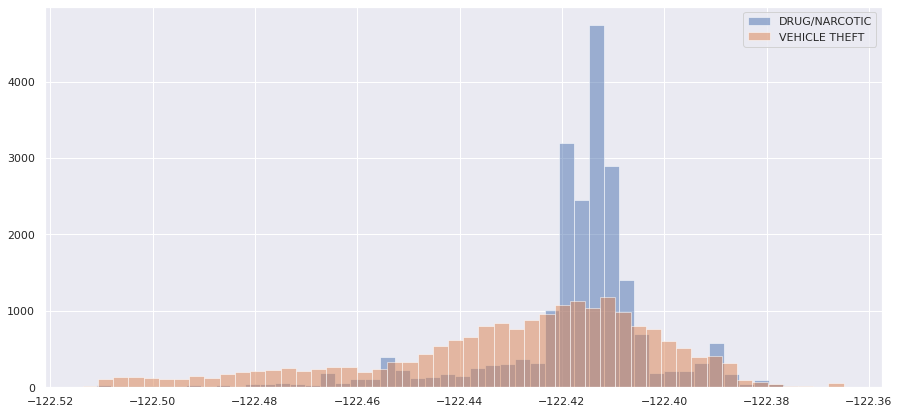

In [ ]:
plt.figure(figsize=(15,7))
plt.hist(df_lat[df_lat.Category==category_1].LAT, bins=50, alpha=0.5, label=category_1)
plt.hist(df_lat[df_lat.Category==category_2].LAT, bins=50, alpha=0.5, label=category_2)
plt.legend()
plt.show()

###### KDE plot

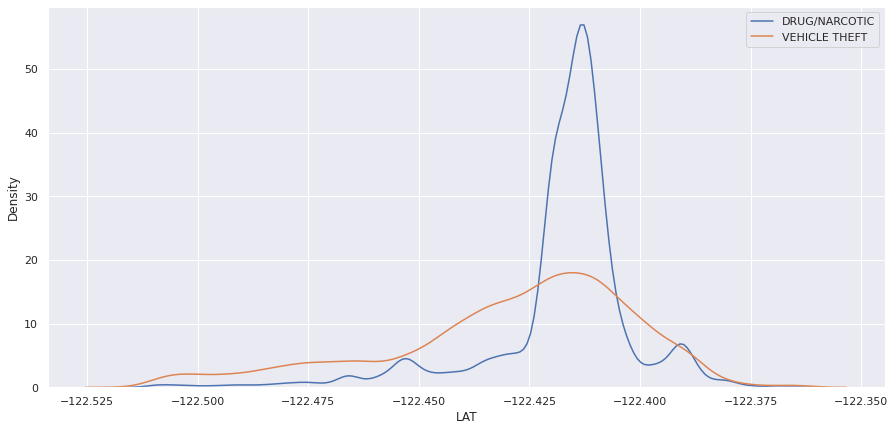

In [ ]:
plt.figure(figsize=(15,7))
sns.kdeplot(df_lat[df_lat.Category==category_1].LAT, alpha=0.5, label=category_1)
sns.kdeplot(df_lat[df_lat.Category==category_2].LAT, alpha=0.5, label=category_2)
plt.legend()
plt.show()

# Part 4

##### **4.1) First start by plotting a map of San Francisco with a nice tight zoom. Simply use the command folium.Map([lat, lon], zoom_start=13), where you'll have to look up San Francisco's longitude and latitude.**

##### **4.2) Next, use the the coordinates for SF City Hall 37.77919, -122.41914 to indicate its location on the map with a nice, pop-up enabled maker. (In the screenshot below, I used the black & white Stamen tiles, because they look cool).**

A map is constructed with the coordinates for San Fransisco (37.762, -122.44) and a popup marker is placed at the City Hall : 

In [ ]:
lat = 37.762 ; lon = -122.44                                                                       # Latitude and longitude for San Fransisco
map_SF = folium.Map([lat, lon], zoom_start=13, height='80%', width='60%',zoom_control=False)       # Create map
folium.Marker([37.77919,-122.41914], popup='City Hall').add_to(map_SF)                             # Add popup Marker

# Make title
title_lat = 37.812 ; title_lon = -122.518                                                          
folium.map.Marker([title_lat, title_lon], icon=folium.features.DivIcon(icon_size=(190,36),icon_anchor=(0,0),html='<div style="font-size: 20pt"><b>Location of San Fransisco City Hall</b></div>',)).add_to(map_SF)

map_SF

From the interactive map the exact location of the San Fransisco City Hall is marked with a popup marker, that tells you what to find at this location on mouse click.

##### **4.3) Now, let's plot some more data (no need for popups this time). Select a couple of months of data for 'DRUG/NARCOTIC' and draw a little dot for each arrest for those two months. You could, for example, choose June-July 2016, but you can choose anything you like - the main concern is to not have too many points as this uses a lot of memory and makes Folium behave non-optimally. We can call this a kind of visualization a point scatter plot.**

Data is filtrered to only contain DRUG/NARCOTIC crimes in the period June-July 2016:

In [ ]:
# Create filtered data set
filter = (df['Year']==2016) & ((df['Month']==6) | (df['Month']==7)) &(df['Category'] == 'DRUG/NARCOTIC')      # Create Filter
df_filtered = df[filter]                                                                                      # Apply Filter

Crime data is plotted on a map of SF. A map filter is added to increase visabilisity of the plotted crime positions:

In [ ]:
# Create map
map_SF = folium.Map([lat, lon], tiles = "Stamen Toner", zoom_start=13, height='80%', width='60%', zoom_control=False)

# Plot data coordinates
for index, row in df_filtered.iterrows():
  folium.CircleMarker([row['Y'], row['X']], radius=1, color='red').add_to(map_SF)

# Add title
folium.map.Marker([title_lat, title_lon], icon=folium.features.DivIcon(icon_size=(190,36),icon_anchor=(0,0),html='<div style="color: white; font-size: 20pt"><b>Location of drug/narcotic crimes in June/July 2016</b></div>',)).add_to(map_SF)

map_SF


From the interactive map trends in drug/narcotic crimes can be found in the period June/July 2016. By zooming in and out exact locations of hot spots can be found. A clutering of crimes reported can be seen in the *Tenderloin District* - around the end of *Turk Street* and *Golden Gate Avenue*. Other clusterings appear in *6th Street*, down *3rd Street*, at *16th Mission St* Metro station  and just before *Golden Gate Park* 

# Part 5

Method initialization:

In [25]:
# Method made to plot patterns in each day of the week
def dayOfWeekPlots(df , time_unit, labelList, max_range = 500):
  time_array = np.sort(df[time_unit].unique())
  day_array = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
  plt.figure(figsize=(20,20))
  for j, dayOfWeek in enumerate(day_array):
    numbers = np.zeros(len(time_array))
    for i, item in enumerate(time_array):
      numbers[i] = len(df[(df[time_unit]==item) & (df['DayOfWeek'] == dayOfWeek)])

    plt.subplot(5,3,j+1)
    plt.title(dayOfWeek)
    plt.bar(labelList,numbers)
    plt.ylim([0,max_range])
    plt.xlabel(time_unit)
    plt.tight_layout()

  plt.show

**For each of the three examples above, describe in your own words how the data-errors I call attention to above can bias the binned versions of the data. Also briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).**

###### 1) Surprising activity for PROSTITUTION on Thursday.

This "data-error" would bias a categorical bar plot with prostitutions per weekday and make Thursday seem like a highly active day for prostitutes. Wereas this seems more like a weekly time slot where the police roam the streets for protitution. To investigate if this is the case we can do some plotting. We'll step back a little and look at reports for each weekdays deuring the years in the data:

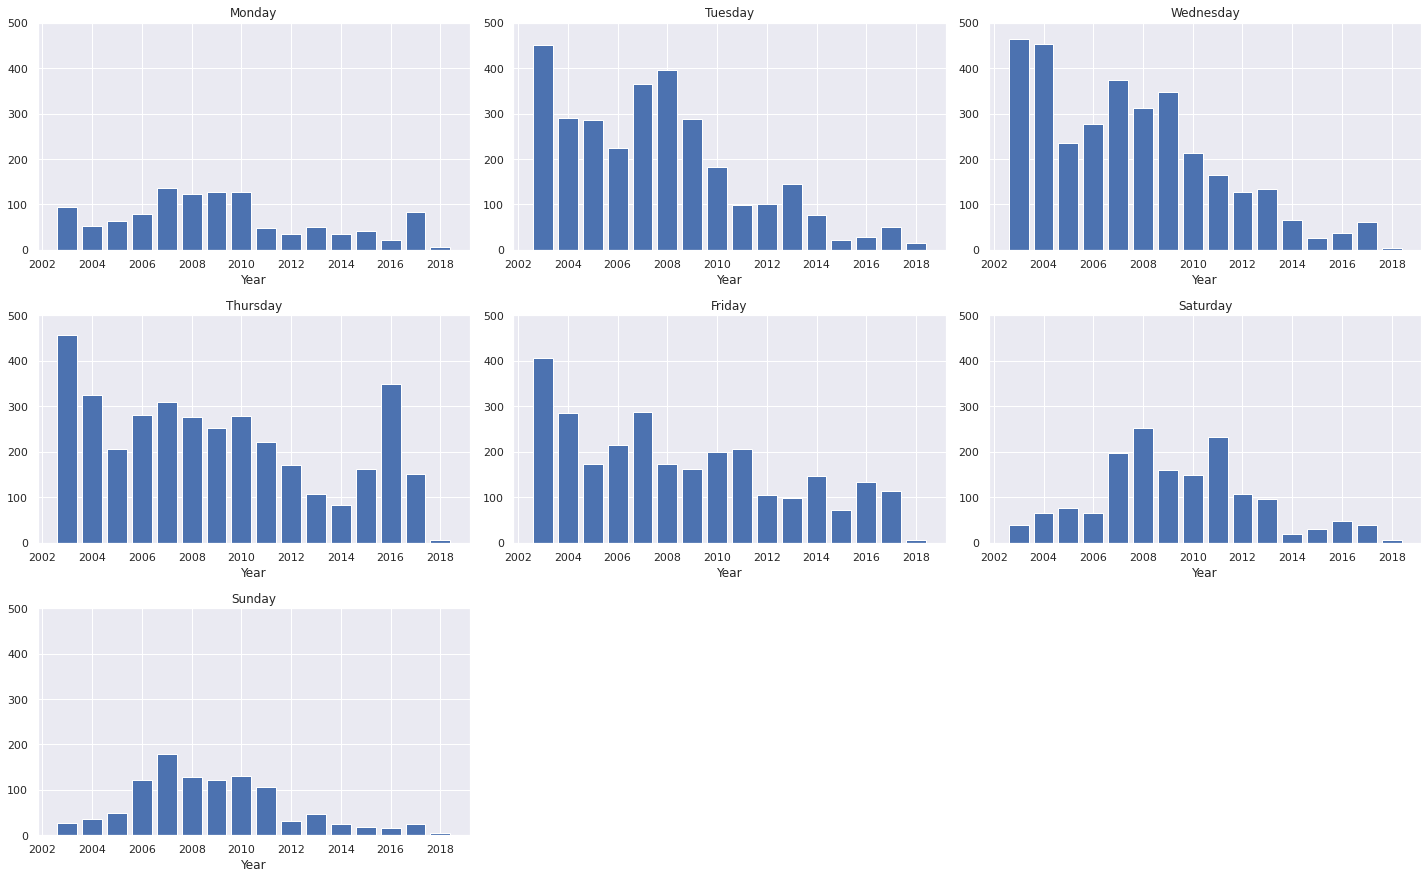

In [26]:
df_p5 = df[(df['Category']=='PROSTITUTION')]
year_labels = np.sort(df_p5['Year'].unique())
dayOfWeekPlots(df_p5, 'Year', year_labels)

Looking closer at the prostitution reports we see a trend in fewer reports over the years however Thursdays in 2016 seems to have an unsual amout of protitution cases. By diving into the specific year 2016 we can get more clearity:

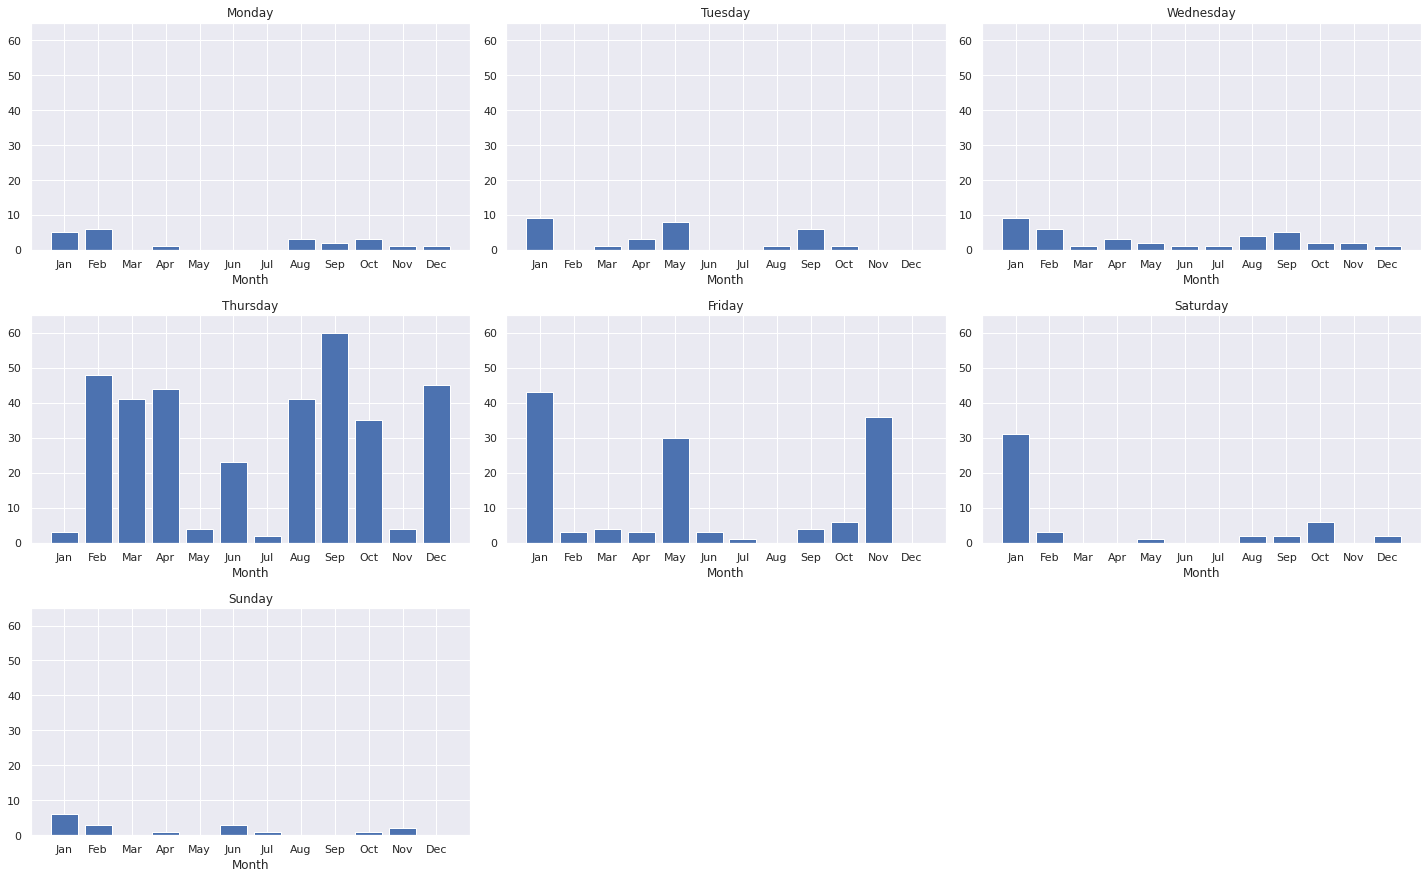

In [27]:
df_p5_2016 = df[(df['Category']=='PROSTITUTION') & (df['Year']==2016)]
month_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dayOfWeekPlots(df_p5_2016, 'Month', month_labels, max_range = 65)

From this it seems like the police have a certain day each month were they roam the streets for prostetution crimes. See the huge amount of reports made on Fridays in January, July and November instead of Thursdays that seems to be the usual prostitution-report-day.

##### 2) Crimes didn't appear to be recorded as frequently in between those round numbers.

For this data-error the bias happens due to lazyness in the police department and it seems like crimes almost never happen in odd time slots. In this way the jitter-plot made is already bias because the data source is corrupted. A less detailet plot would in this case be more appropriat to hide this bias in the uncertanty of execution time. The current jitter-plot could misslead people to think that the crimes in San Fransisco were highly related to eachother and were planned accordingly to take place at the same time.

##### 3) Hall of Justice as unlikely hotspot for sex offences.

The case with the many sex offences located at the Hall of Justice must be due to people visiting Hall of justice to report sex offences and policemen falsely writing the hall of justice as the location of the incidence when the report were made. This would bias plots concerning placement of crimes such as the heat map from week 4 or the latitude plot created in part 3. This could be misslead poeple to think that a lot of sex offences were made by policemen or at least in the Hall of Justice.